In [227]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from wordcloud import WordCloud
from PyPDF2 import PdfReader
import glob
from PIL import Image, ImageDraw

In [174]:
trauma_path = '/Users/JakeCanfield/Documents/Trauma_Surgery_Research/'
topics = os.listdir(trauma_path + 'Papers/')

In [175]:
df = pd.DataFrame(columns=['Topic', '# of Papers Read'])
for i in topics:
    papers = os.listdir(trauma_path+'Papers/'+'%s'%i)
    papers = [i for i in papers if i != '.ipynb_checkpoints']
    df = df.append({'Topic':i,'# of Papers Read':len(papers)}, ignore_index=True)
df['# of Papers Read'] = df['# of Papers Read'].astype('int')

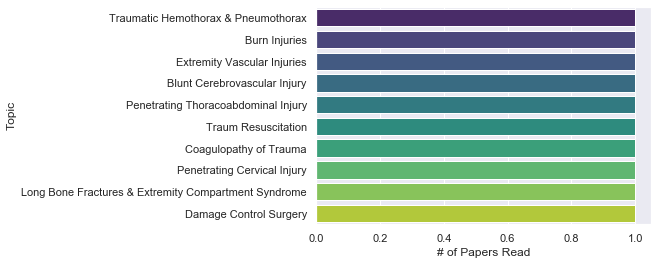

In [176]:
f = sns.barplot(y=df['Topic'], x=df['# of Papers Read'],palette='viridis')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={"figure.dpi":10000, 'savefig.dpi':300})
plt.show()

In [206]:
pdfs = glob.glob(trauma_path +'Papers/*/*/*.pdf')
words = []
for i in pdfs:
    reader = PdfReader(i)
    npages = len(reader.pages)
    for x in range(0,npages):
        page = reader.pages[x]
        text = page.extract_text().split()
        for y in text:
            words.append(y)

In [228]:
words = ' '.join(words)

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

AttributeError: 'ImageDraw' object has no attribute 'textbbox'